<a href="https://colab.research.google.com/github/elewin2022/Data_Sci/blob/main/Lab_6_Linear_Fit_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://setosa.io/ev/ordinary-least-squares-regression/

In [ ]:
#going to create a model of a straight line to make a guess about some data we do not have

In [ ]:
#idea is that you would use the red line as the model

In [ ]:
#we want to know how wrong is this model

In [ ]:
#we square the error because we do not want positive and negatives to cancel out, so we square the error so the negative goes away and they become squares (actually square). We want to figure out the one with the least squares

In [ ]:
#the idea extends into more than two demisions. Models used to make a guess about something with a limited amount of data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import urllib.request

In [ ]:
#ceral.svs, hit raw, shows data by itself 

In [ ]:
url = "https://raw.githubusercontent.com/elewin2022/Data_Sci/main/cereal_data.csv"

In [ ]:
urllib.request.urlretrieve(url, 'cereal_data.csv')

('cereal_data.csv', <http.client.HTTPMessage at 0x7f23f3da3390>)

In [ ]:
cereal_data = pd.read_csv('cereal_data.csv') #stands for comma seperated values

In [ ]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
#now we can look at these individually by looking at variable, it has button that can click as button format, but we want to plot

In [ ]:
cereal_data["sugars"] #gives you grams of sugar in cereal one and so on 

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [ ]:
cereal_data[["calories" ,"sugars"]]

,calories,sugars
0,70,6
1,120,8
2,70,5
3,50,0
4,110,8
...,...,...
72,110,3
73,110,12
74,100,3
75,100,3


In [ ]:
cereal_data["sugars"].mean()

6.922077922077922

In [ ]:
cereal_data[["calories", "sugars"]].mean()

calories    106.883117
sugars        6.922078
dtype: float64

In [ ]:
cereal_data.describe() #describes information in the table

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


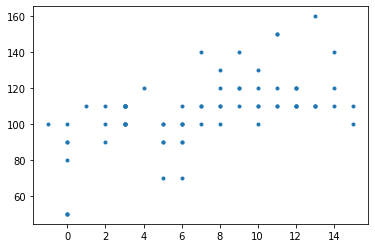

In [ ]:
plt.plot(cereal_data[["sugars"]], cereal_data[["calories"]],'.') #cereal data of sugars vs calories

Text(0.5, 1.0, 'Sugars vs Calories')

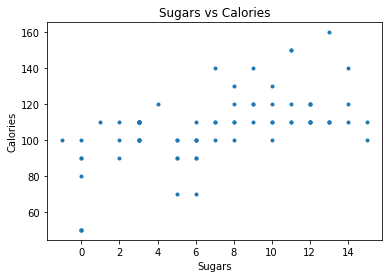

In [ ]:
x = cereal_data[["sugars"]] #same thing from line above, just split it up into two steps by defining x and y variable making it easier to read
y = cereal_data[["calories"]]

plt.plot(x,y, '.')
plt.xlabel("Sugars")
plt.ylabel("Calories")
plt.title("Sugars vs Calories")

Text(0.5, 1.0, 'Fat vs Calories')

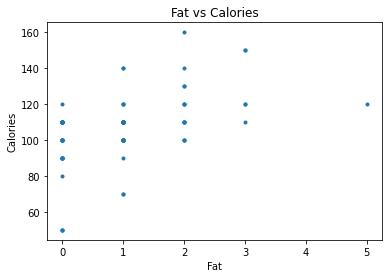

In [ ]:
x = cereal_data[["fat"]]
y = cereal_data[["calories"]]

plt.plot(x,y, '.')
plt.xlabel("Fat")
plt.ylabel("Calories")
plt.title("Fat vs Calories")

Text(0.5, 1.0, 'Sodium vs Protein')

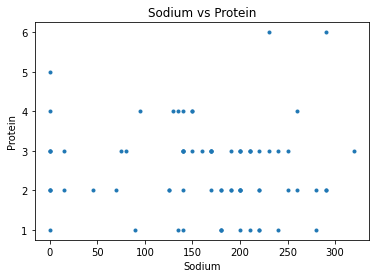

In [ ]:
x = cereal_data[["sodium"]] 
y = cereal_data[["protein"]]

plt.plot(x,y, '.')
plt.xlabel("Sodium")
plt.ylabel("Protein")
plt.title("Sodium vs Protein")

In [ ]:
#new cereal never seen before can guess how popular it's going to be

In [ ]:
X = cereal_data[["sugars"]]
Y = cereal_data[["rating"]]

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [ ]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

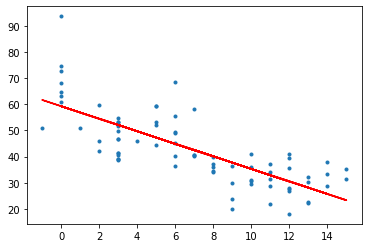

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X, Y_pred, color= 'red')
plt.show()

In [ ]:
x = np.linspace(0,10,50) #zero to ten in 50 steps

In [ ]:
x #print it out to remind us what it does

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [ ]:
m = 3
b = 7

y = m * x + b

In [ ]:
noise =  10 * np.random.randn(50,) #use randn function to tell it to use 50 points because that's how many we have up here

In [ ]:
y = m * x + b + noise #noise is just random numbers, there's awlays going to be noise, buildin model of data (synthetic data set)

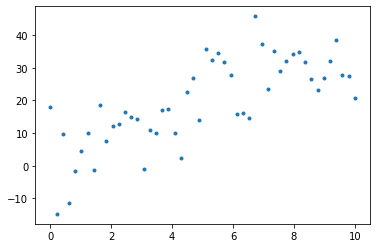

In [ ]:
plt.plot(x,y, '.') #point cloud drifting up and to the right

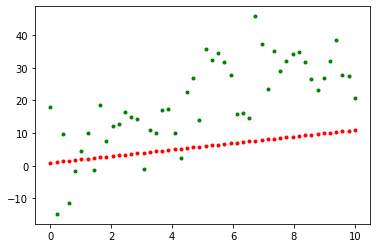

In [ ]:
m_guess = 1 #plot out guess in red
b_guess = 1 

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess, 'r.');
plt.plot(x,y, 'g.')

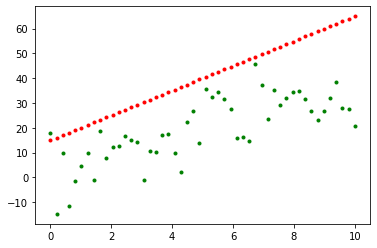

In [ ]:
m_guess = 5 #plot out guess in red in linear straight line
b_guess = 15 

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess, 'r.');
plt.plot(x,y, 'g.')

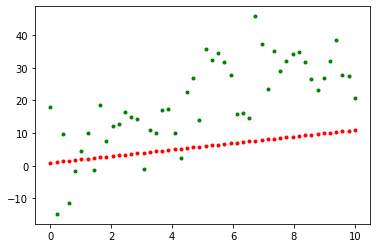

In [ ]:
m_guess = 1 #plot out guess in red (line doesn't go through data)
b_guess = 1 

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess, 'r.');
plt.plot(x,y, 'g.')

In [ ]:
loss = np.sum((y_guess - y)**2) #this tells us how wrong we are with our guess (we guess with m and b intercepts)

In [ ]:
loss


15306.916722158026

In [ ]:
for m_guess in np.linspace(-10,10,10):
    print(m_guess)

-10.0
-7.777777777777778
-5.555555555555555
-3.333333333333333
-1.1111111111111107
1.1111111111111107
3.333333333333334
5.555555555555557
7.777777777777779
10.0


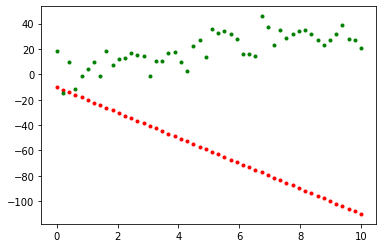

396787.46085890755 -10.0 -10.0


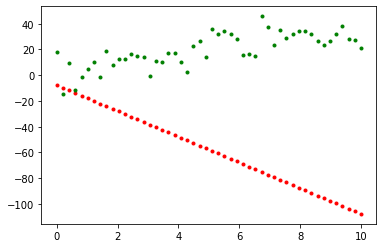

379362.5517258672 -10.0 -7.777777777777778


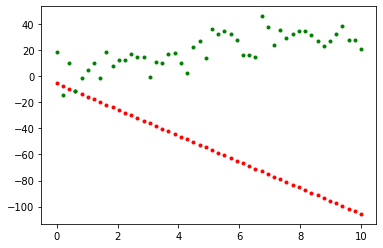

362431.4697533208 -10.0 -5.555555555555555


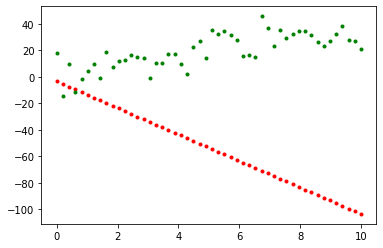

345994.21494126815 -10.0 -3.333333333333333


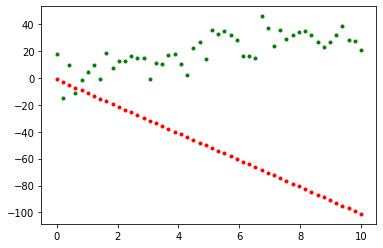

330050.7872897094 -10.0 -1.1111111111111107


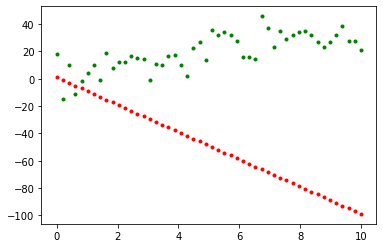

314601.18679864437 -10.0 1.1111111111111107


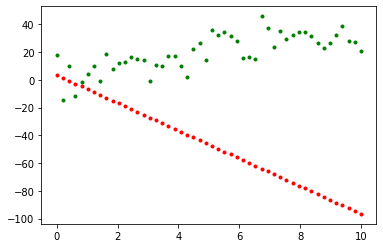

299645.41346807336 -10.0 3.333333333333334


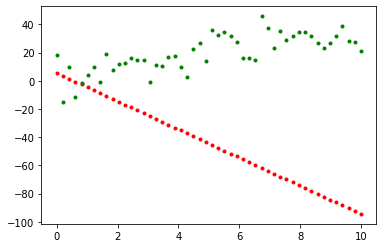

285183.467297996 -10.0 5.555555555555557


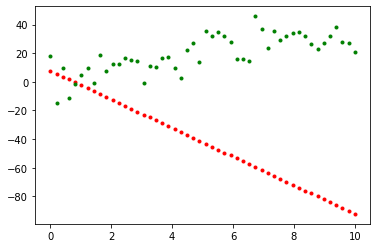

271215.34828841256 -10.0 7.777777777777779


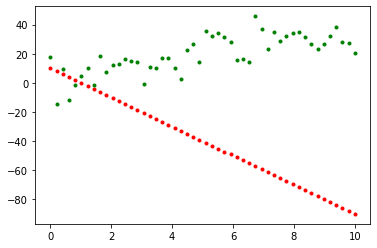

257741.05643932289 -10.0 10.0


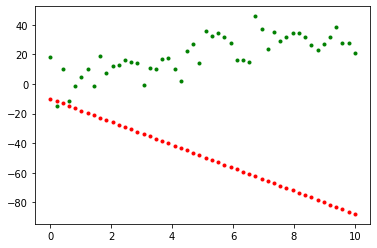

291106.036835299 -7.777777777777778 -10.0


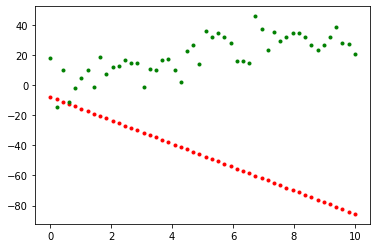

276150.2635047278 -7.777777777777778 -7.777777777777778


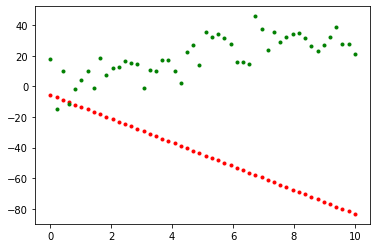

261688.31733465052 -7.777777777777778 -5.555555555555555


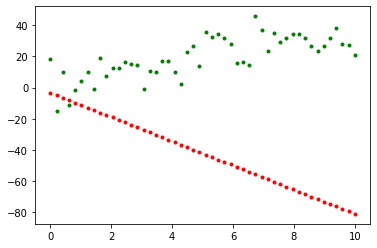

247720.19832506703 -7.777777777777778 -3.333333333333333


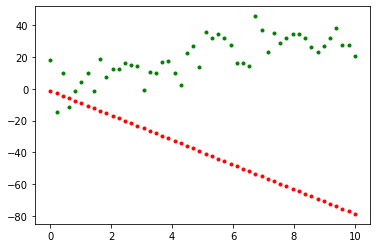

234245.90647597742 -7.777777777777778 -1.1111111111111107


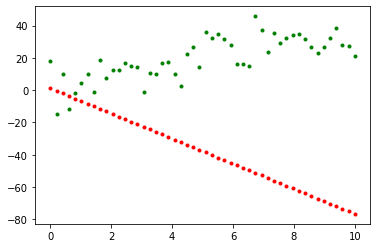

221265.44178738157 -7.777777777777778 1.1111111111111107


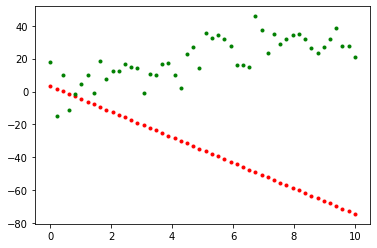

208778.80425927957 -7.777777777777778 3.333333333333334


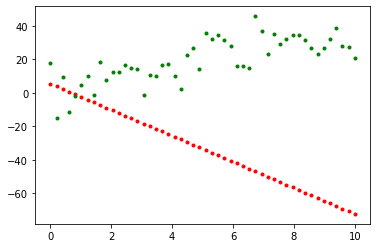

196785.99389167142 -7.777777777777778 5.555555555555557


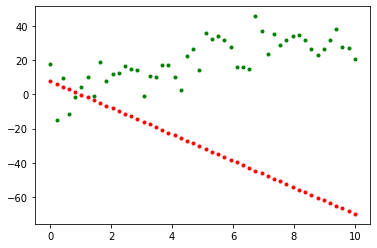

185287.01068455708 -7.777777777777778 7.777777777777779


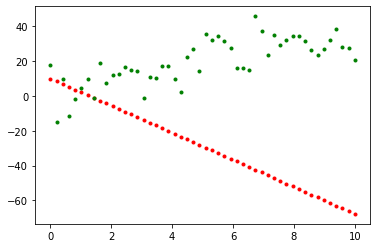

174281.85463793657 -7.777777777777778 10.0


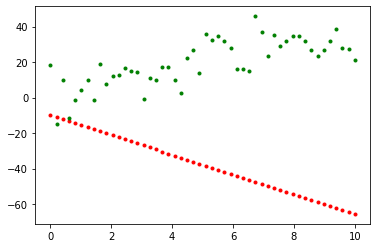

202053.48658342136 -5.555555555555555 -10.0


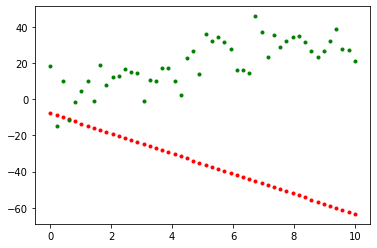

189566.8490553193 -5.555555555555555 -7.777777777777778


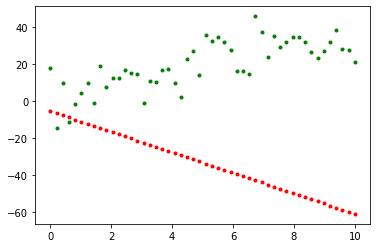

177574.03868771117 -5.555555555555555 -5.555555555555555


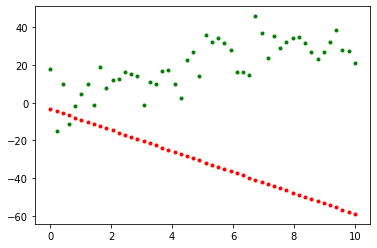

166075.0554805968 -5.555555555555555 -3.333333333333333


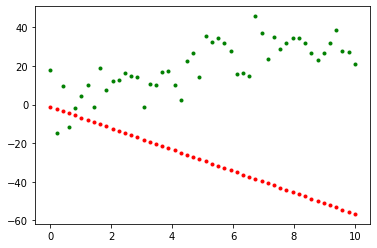

155069.89943397627 -5.555555555555555 -1.1111111111111107


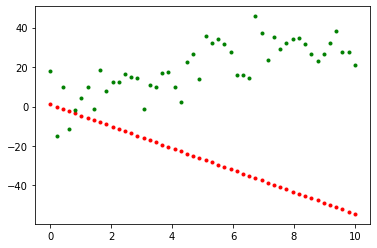

144558.57054784964 -5.555555555555555 1.1111111111111107


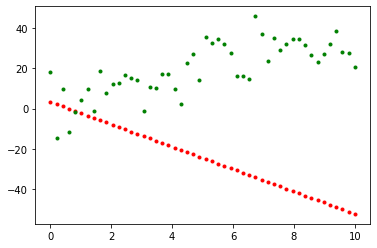

134541.06882221674 -5.555555555555555 3.333333333333334


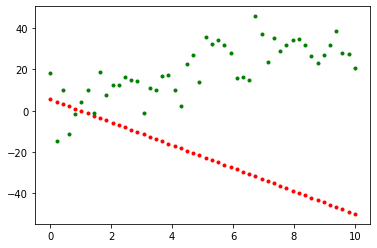

125017.3942570777 -5.555555555555555 5.555555555555557


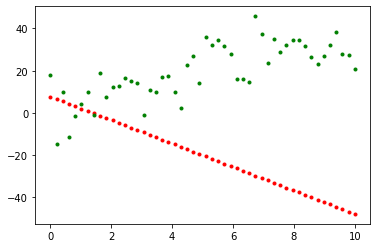

115987.54685243253 -5.555555555555555 7.777777777777779


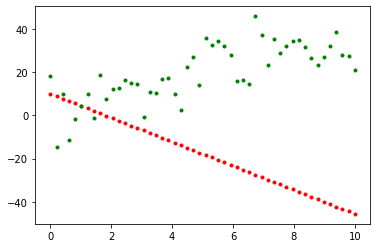

107451.52660828116 -5.555555555555555 10.0


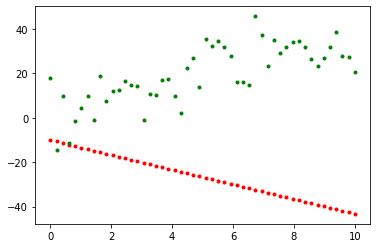

129629.81010327462 -3.333333333333333 -10.0


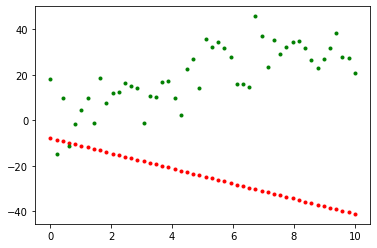

119612.30837764176 -3.333333333333333 -7.777777777777778


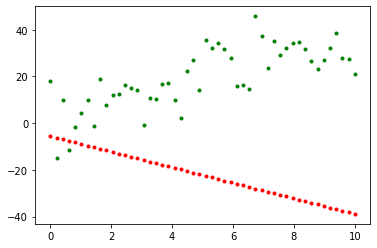

110088.63381250273 -3.333333333333333 -5.555555555555555


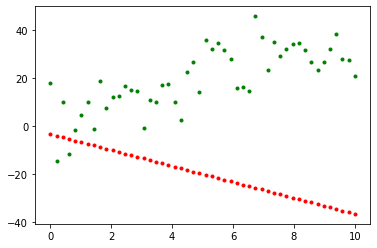

101058.78640785751 -3.333333333333333 -3.333333333333333


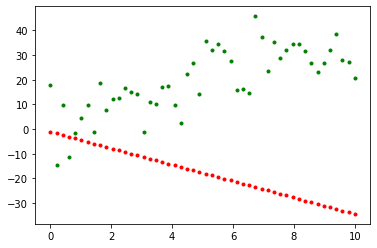

92522.76616370612 -3.333333333333333 -1.1111111111111107


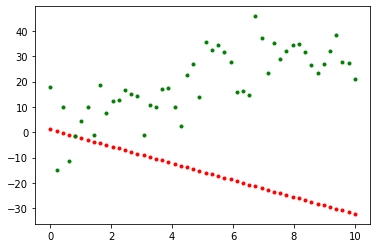

84480.57308004859 -3.333333333333333 1.1111111111111107


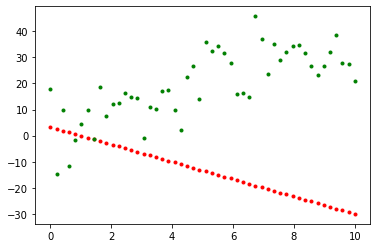

76932.20715688485 -3.333333333333333 3.333333333333334


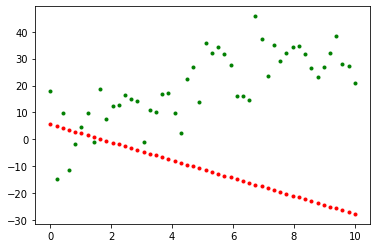

69877.66839421495 -3.333333333333333 5.555555555555557


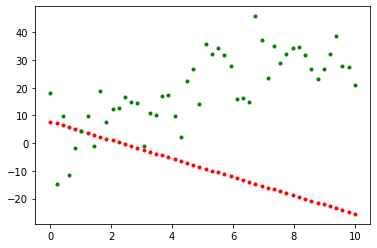

63316.956792038894 -3.333333333333333 7.777777777777779


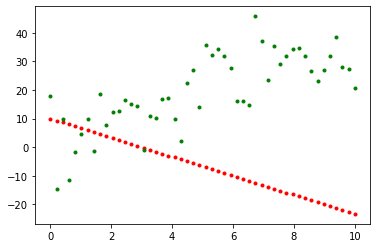

57250.072350356655 -3.333333333333333 10.0


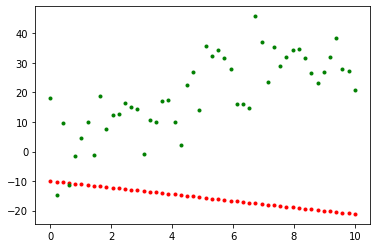

73835.00739485881 -1.1111111111111107 -10.0


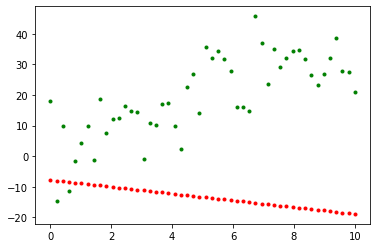

66286.64147169508 -1.1111111111111107 -7.777777777777778


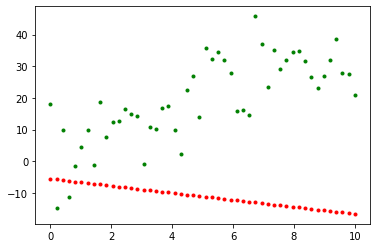

59232.10270902519 -1.1111111111111107 -5.555555555555555


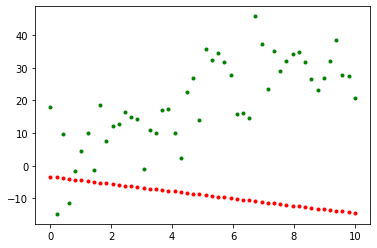

52671.39110684912 -1.1111111111111107 -3.333333333333333


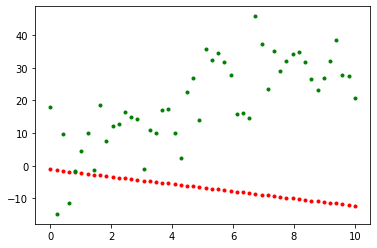

46604.50666516688 -1.1111111111111107 -1.1111111111111107


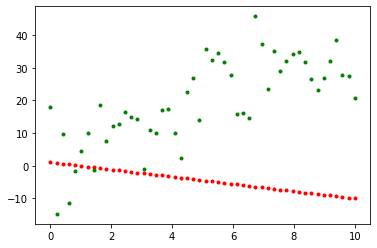

41031.44938397846 -1.1111111111111107 1.1111111111111107


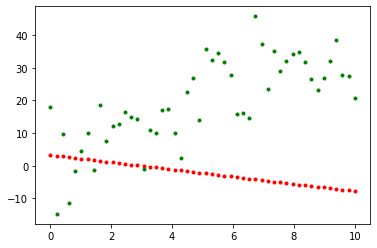

35952.219263283885 -1.1111111111111107 3.333333333333334


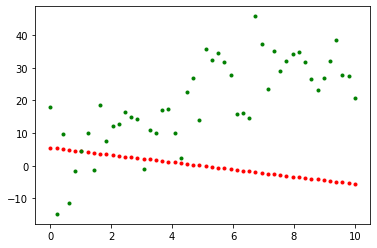

31366.816303083117 -1.1111111111111107 5.555555555555557


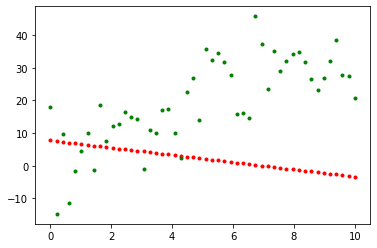

27275.240503376186 -1.1111111111111107 7.777777777777779


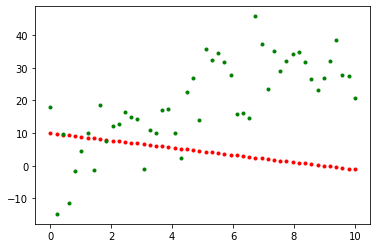

23677.491864163087 -1.1111111111111107 10.0


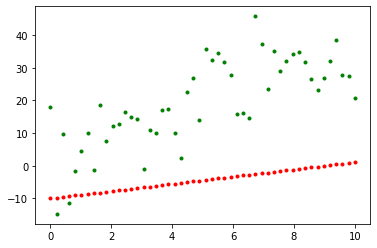

34669.078458173935 1.1111111111111107 -10.0


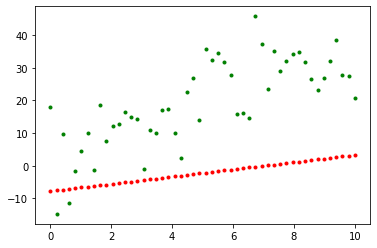

29589.84833747935 1.1111111111111107 -7.777777777777778


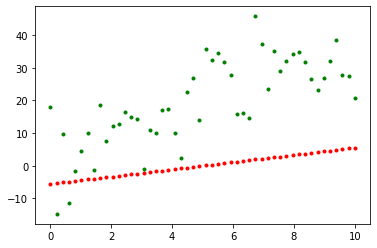

25004.445377278586 1.1111111111111107 -5.555555555555555


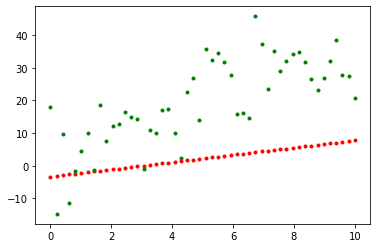

20912.869577571655 1.1111111111111107 -3.333333333333333


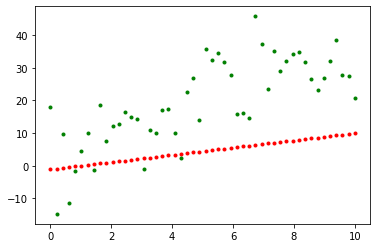

17315.12093835855 1.1111111111111107 -1.1111111111111107


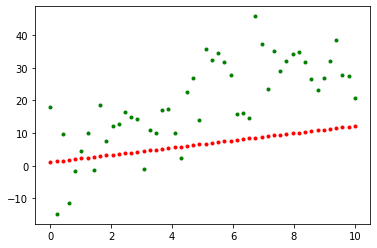

14211.199459639272 1.1111111111111107 1.1111111111111107


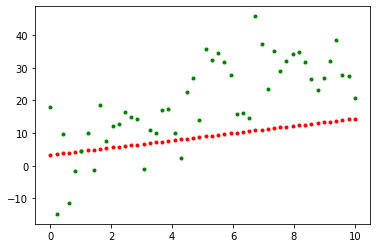

11601.10514141382 1.1111111111111107 3.333333333333334


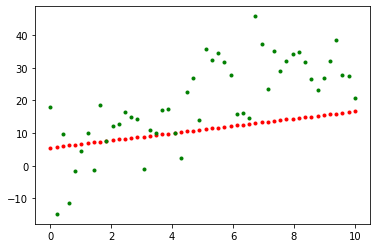

9484.837983682195 1.1111111111111107 5.555555555555557


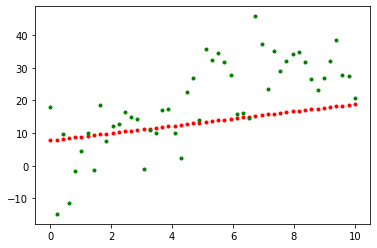

7862.397986444398 1.1111111111111107 7.777777777777779


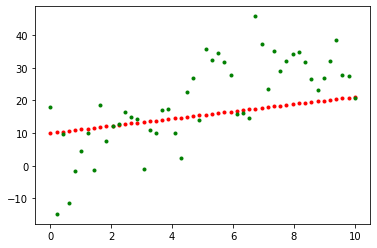

6733.785149700429 1.1111111111111107 10.0


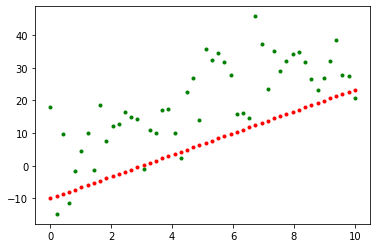

12132.02329321996 3.333333333333334 -10.0


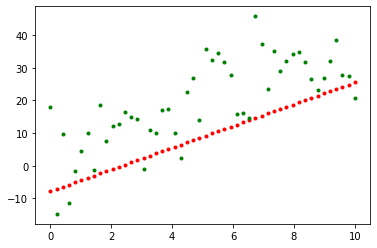

9521.928974994513 3.333333333333334 -7.777777777777778


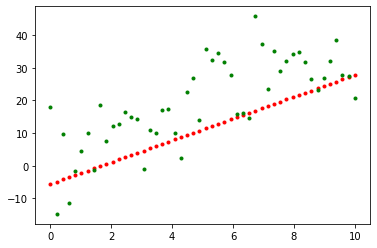

7405.661817262886 3.333333333333334 -5.555555555555555


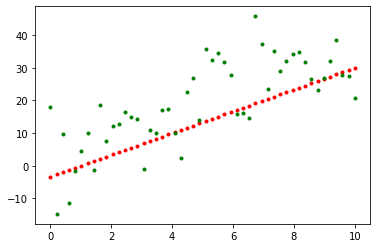

5783.221820025091 3.333333333333334 -3.333333333333333


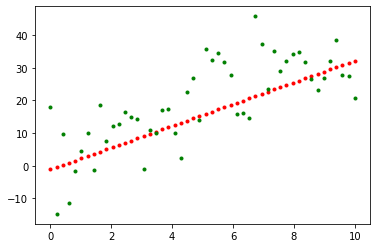

4654.608983281122 3.333333333333334 -1.1111111111111107


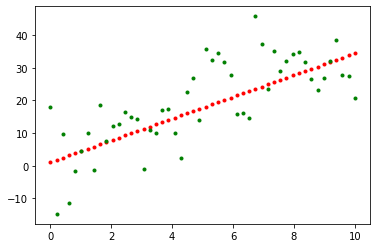

4019.8233070309807 3.333333333333334 1.1111111111111107


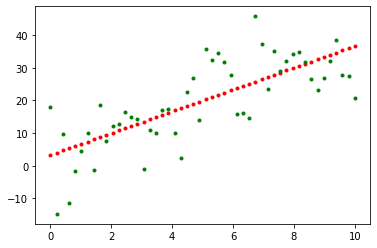

3878.864791274666 3.333333333333334 3.333333333333334


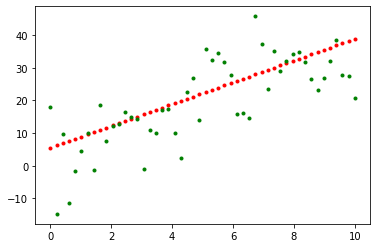

4231.7334360121795 3.333333333333334 5.555555555555557


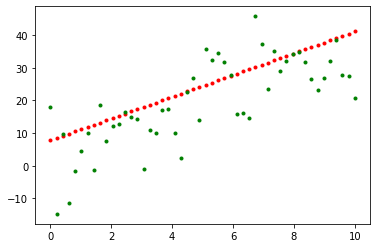

5078.42924124352 3.333333333333334 7.777777777777779


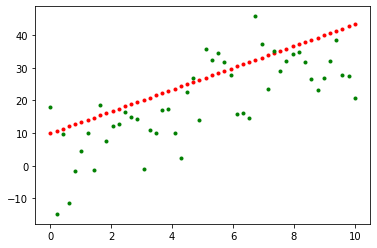

6418.9522069686855 3.333333333333334 10.0


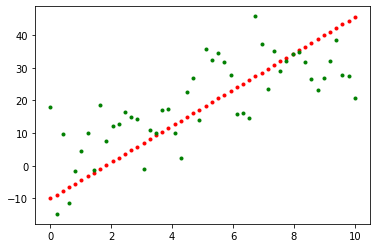

6223.841899996915 5.555555555555557 -10.0


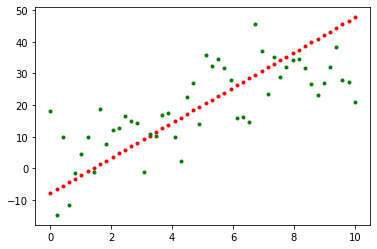

6082.883384240603 5.555555555555557 -7.777777777777778


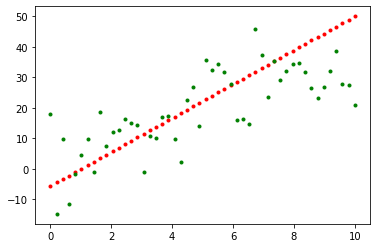

6435.752028978115 5.555555555555557 -5.555555555555555


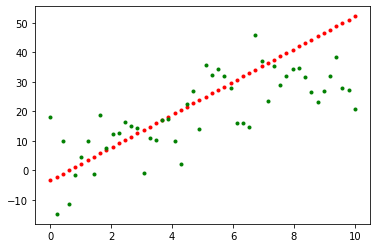

7282.447834209457 5.555555555555557 -3.333333333333333


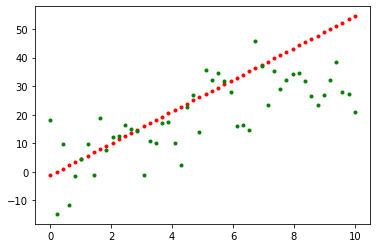

8622.970799934625 5.555555555555557 -1.1111111111111107


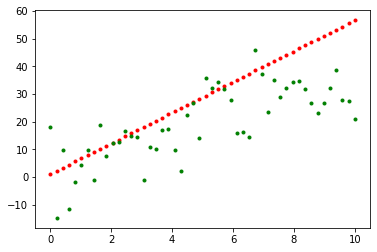

10457.320926153621 5.555555555555557 1.1111111111111107


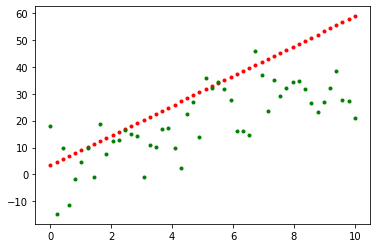

12785.498212866443 5.555555555555557 3.333333333333334


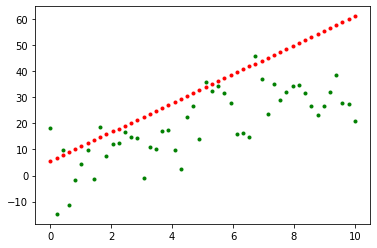

15607.502660073096 5.555555555555557 5.555555555555557


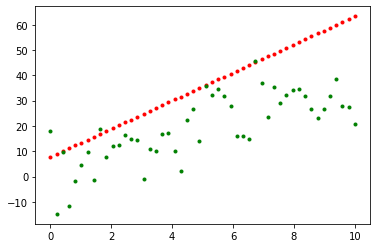

18923.33426777357 5.555555555555557 7.777777777777779


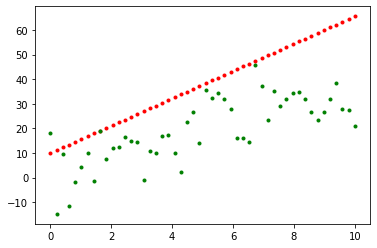

22732.993035967876 5.555555555555557 10.0


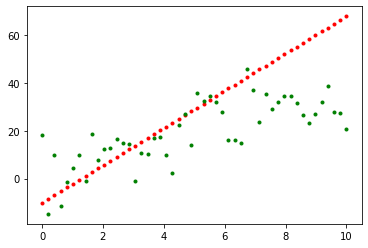

16944.534278504783 7.777777777777779 -10.0


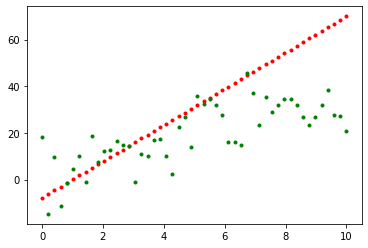

19272.711565217607 7.777777777777779 -7.777777777777778


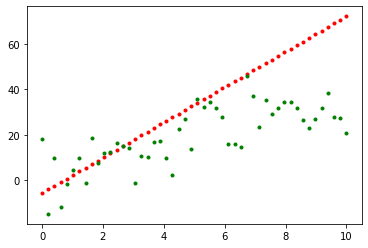

22094.71601242425 7.777777777777779 -5.555555555555555


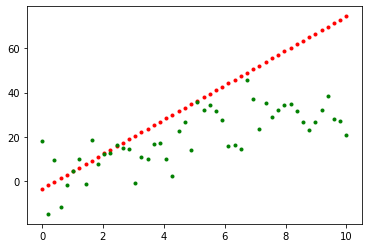

25410.547620124733 7.777777777777779 -3.333333333333333


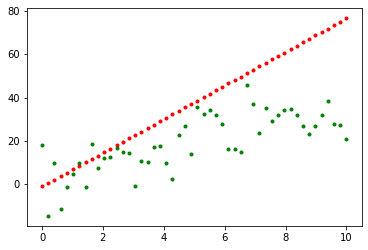

29220.20638831903 7.777777777777779 -1.1111111111111107


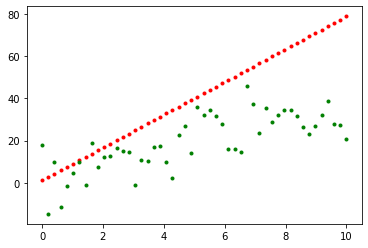

33523.69231700717 7.777777777777779 1.1111111111111107


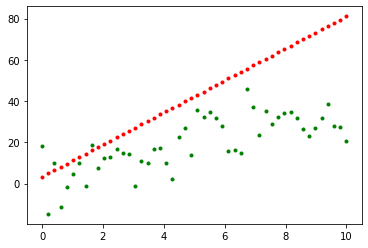

38321.00540618911 7.777777777777779 3.333333333333334


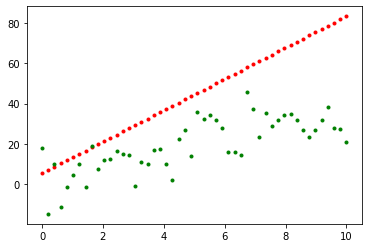

43612.145655864915 7.777777777777779 5.555555555555557


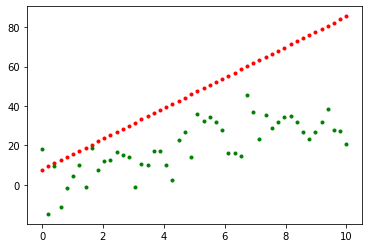

49397.113066034515 7.777777777777779 7.777777777777779


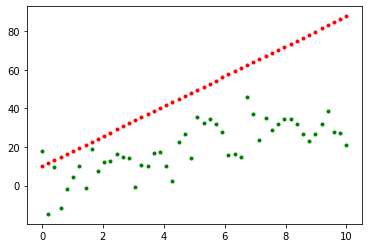

55675.90763669796 7.777777777777779 10.0


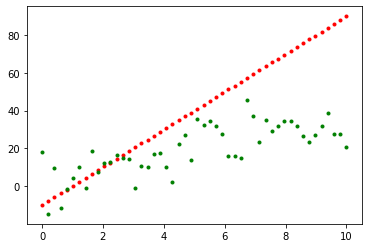

44294.10042874355 10.0 -10.0


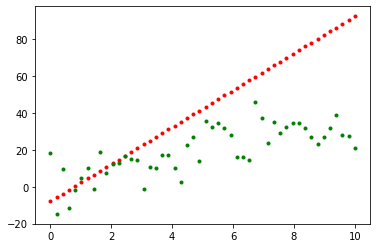

49091.413517925525 10.0 -7.777777777777778


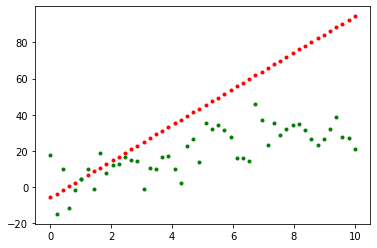

54382.5537676013 10.0 -5.555555555555555


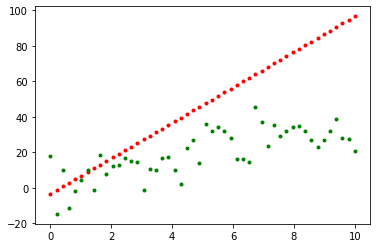

60167.52117777092 10.0 -3.333333333333333


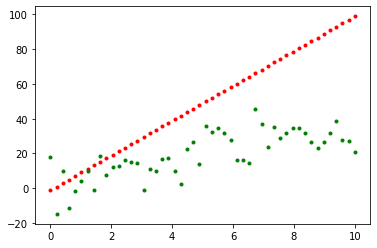

66446.31574843434 10.0 -1.1111111111111107


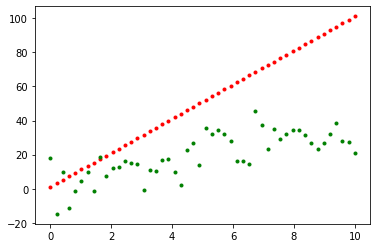

73218.93747959162 10.0 1.1111111111111107


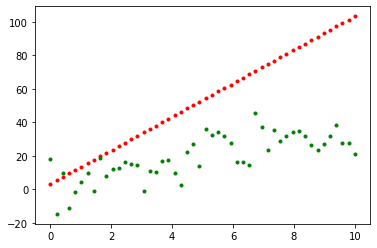

80485.3863712427 10.0 3.333333333333334


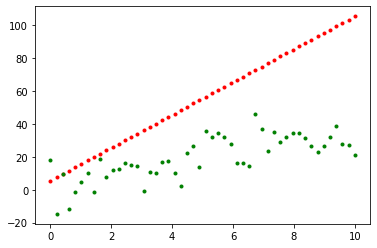

88245.66242338764 10.0 5.555555555555557


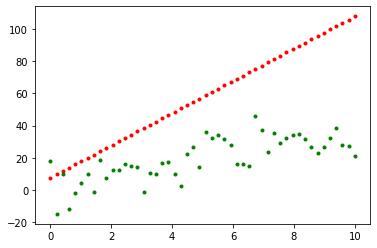

96499.76563602638 10.0 7.777777777777779


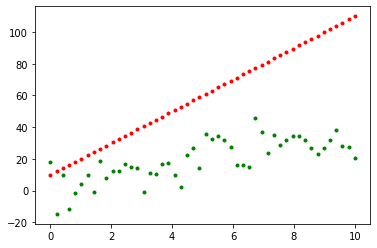

105247.69600915896 10.0 10.0


In [ ]:
for m_guess in np.linspace(-10,10,10): #double loop
    for b_guess in np.linspace(-10,10,10):
        
        y_guess = m_guess * x + b_guess

        plt.plot(x,y_guess,'r.');
        plt.plot(x,y,'g.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess) #look through list of losses and see which one goes through x and y intercepts

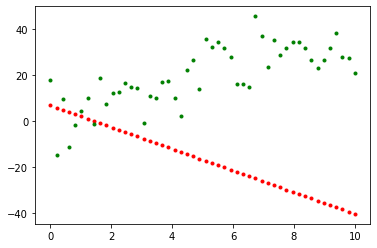

98006.75912129962 -4.736842105263158 6.842105263157894


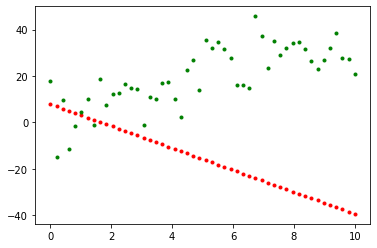

94234.23368093367 -4.736842105263158 7.894736842105264


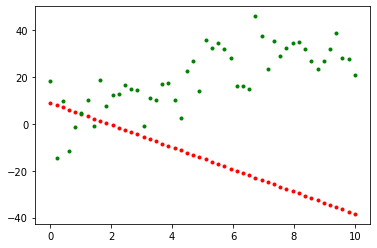

90572.51156466747 -4.736842105263158 8.94736842105263


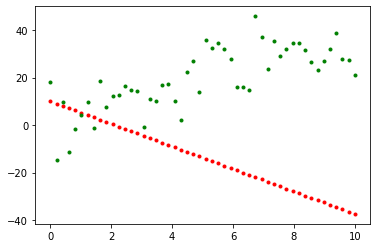

87021.59277250094 -4.736842105263158 10.0


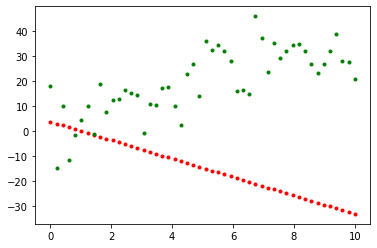

83714.55995704033 -3.6842105263157894 3.6842105263157894


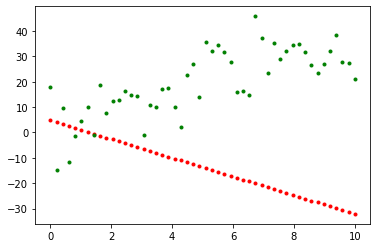

80163.64116487381 -3.6842105263157894 4.7368421052631575


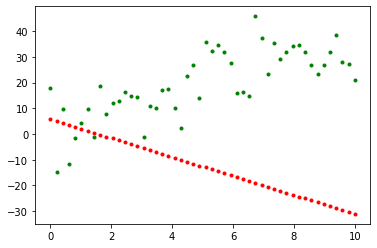

76723.52569680705 -3.6842105263157894 5.789473684210526


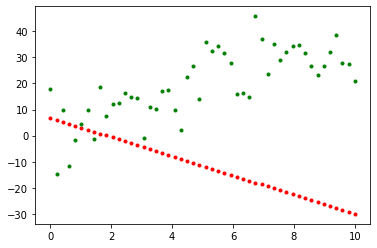

73394.21355283997 -3.6842105263157894 6.842105263157894


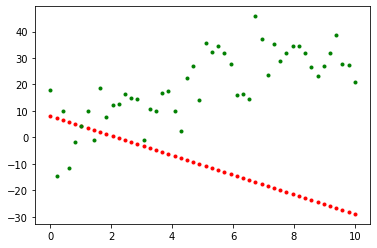

70175.70473297263 -3.6842105263157894 7.894736842105264


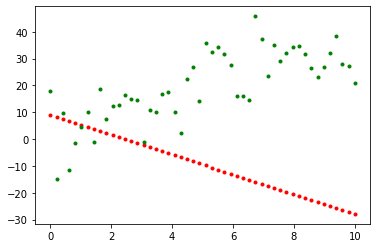

67067.99923720502 -3.6842105263157894 8.94736842105263


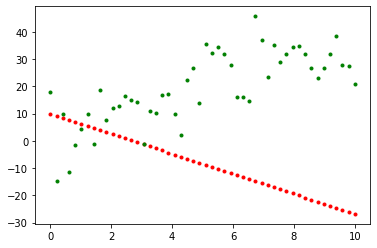

64071.097065537135 -3.6842105263157894 10.0


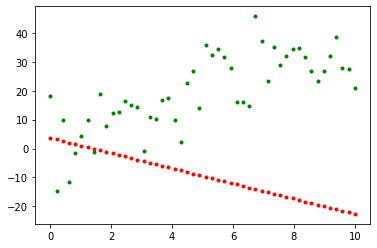

61171.09686921837 -2.6315789473684212 3.6842105263157894


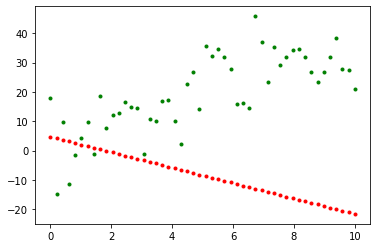

58174.194697550476 -2.6315789473684212 4.7368421052631575


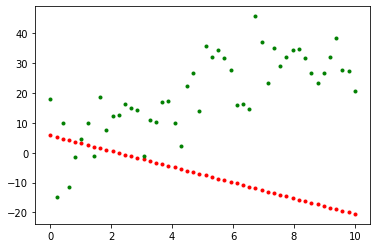

55288.09584998231 -2.6315789473684212 5.789473684210526


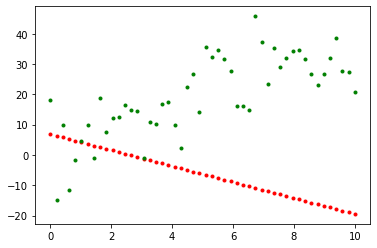

52512.80032651386 -2.6315789473684212 6.842105263157894


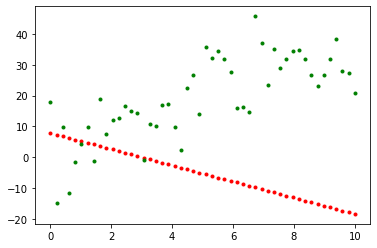

49848.30812714515 -2.6315789473684212 7.894736842105264


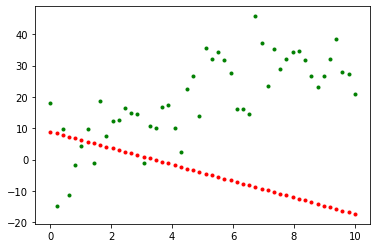

47294.619251876145 -2.6315789473684212 8.94736842105263


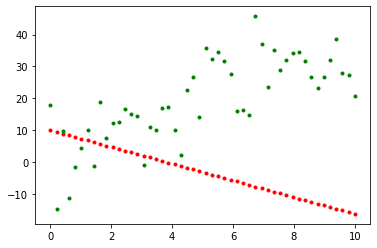

44851.73370070688 -2.6315789473684212 10.0


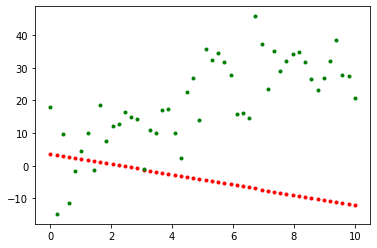

42358.76612352994 -1.578947368421053 3.6842105263157894


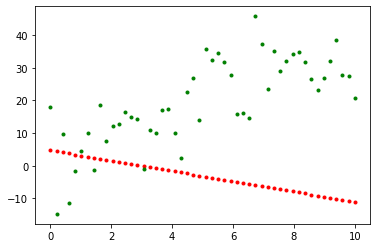

39915.88057236067 -1.578947368421053 4.7368421052631575


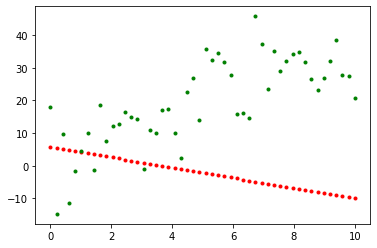

37583.798345291114 -1.578947368421053 5.789473684210526


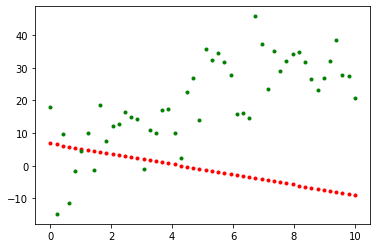

35362.51944232129 -1.578947368421053 6.842105263157894


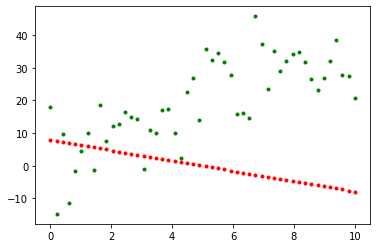

33252.04386345118 -1.578947368421053 7.894736842105264


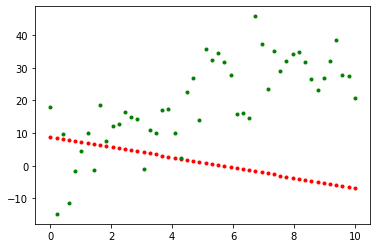

31252.3716086808 -1.578947368421053 8.94736842105263


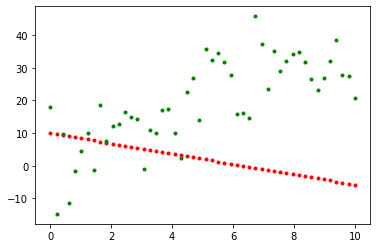

29363.50267801014 -1.578947368421053 10.0


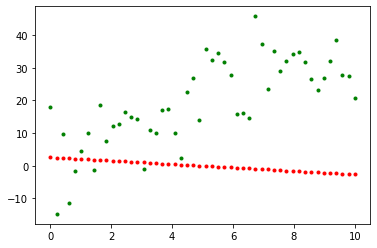

29277.239974745422 -0.526315789473685 2.6315789473684212


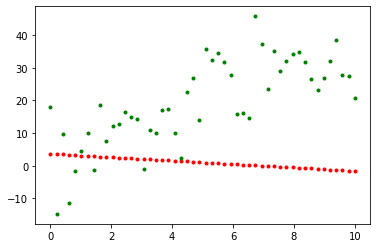

27277.56771997504 -0.526315789473685 3.6842105263157894


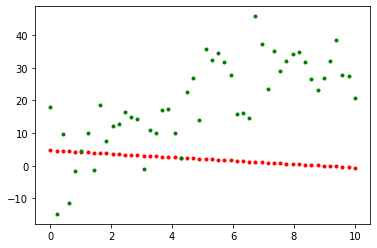

25388.69878930438 -0.526315789473685 4.7368421052631575


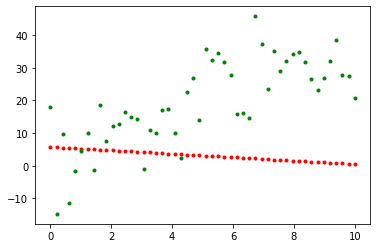

23610.633182733443 -0.526315789473685 5.789473684210526


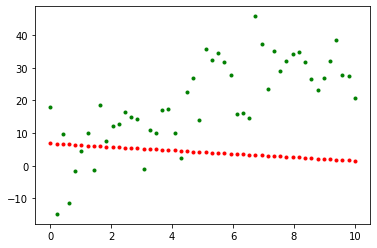

21943.370900262234 -0.526315789473685 6.842105263157894


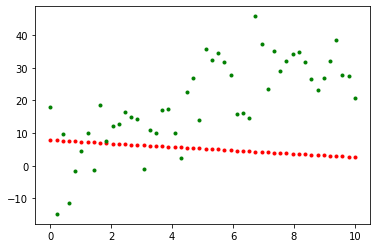

20386.91194189074 -0.526315789473685 7.894736842105264


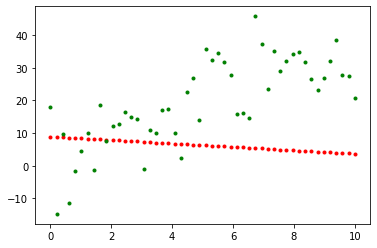

18941.256307618976 -0.526315789473685 8.94736842105263


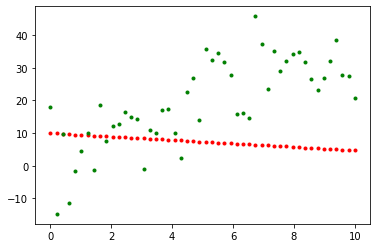

17606.40399744693 -0.526315789473685 10.0


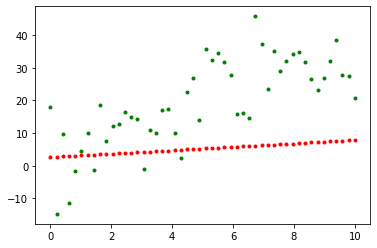

17373.157292825435 0.5263157894736832 2.6315789473684212


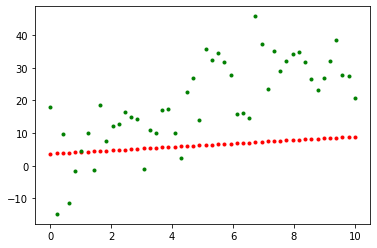

15927.501658553667 0.5263157894736832 3.6842105263157894


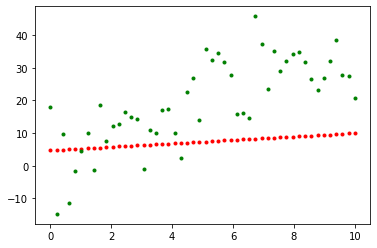

14592.649348381625 0.5263157894736832 4.7368421052631575


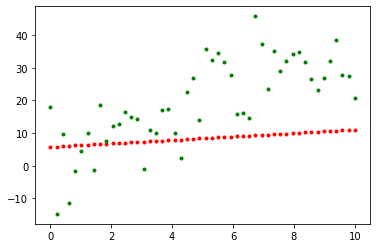

13368.600362309304 0.5263157894736832 5.789473684210526


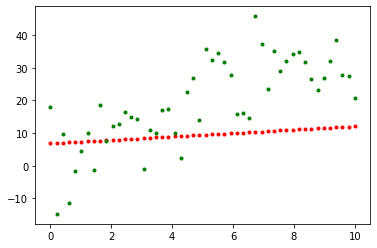

12255.354700336708 0.5263157894736832 6.842105263157894


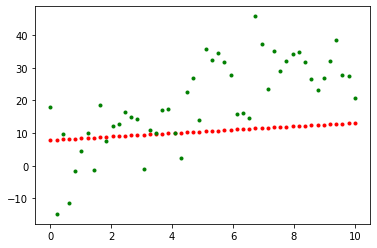

11252.912362463829 0.5263157894736832 7.894736842105264


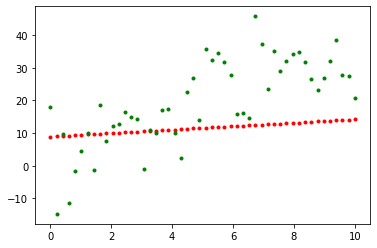

10361.27334869068 0.5263157894736832 8.94736842105263


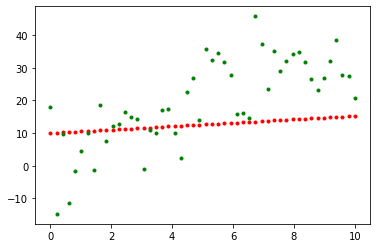

9580.437659017249 0.5263157894736832 10.0


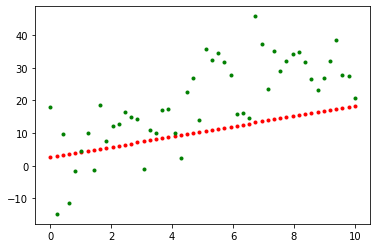

9200.206953038978 1.5789473684210513 2.6315789473684212


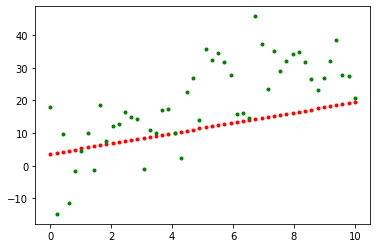

8308.567939265824 1.5789473684210513 3.6842105263157894


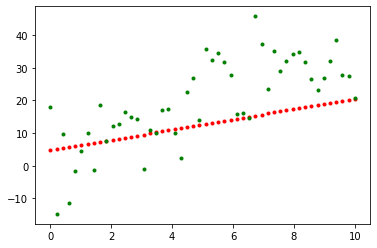

7527.732249592396 1.5789473684210513 4.7368421052631575


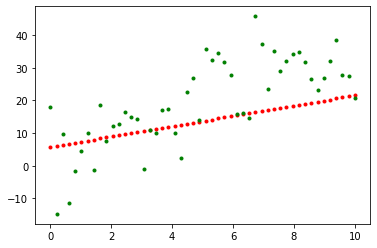

6857.69988401869 1.5789473684210513 5.789473684210526


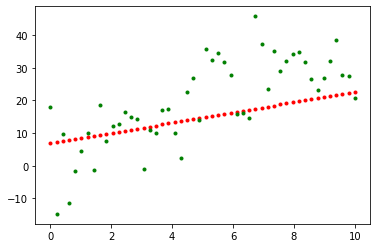

6298.470842544707 1.5789473684210513 6.842105263157894


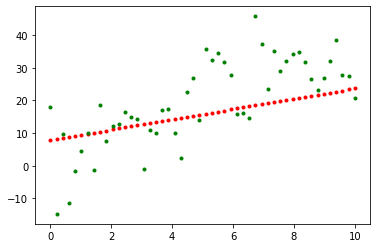

5850.045125170446 1.5789473684210513 7.894736842105264


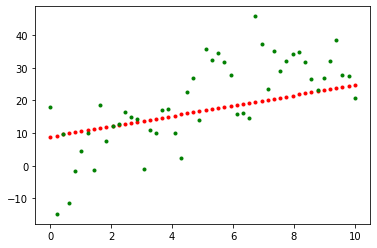

5512.42273189591 1.5789473684210513 8.94736842105263


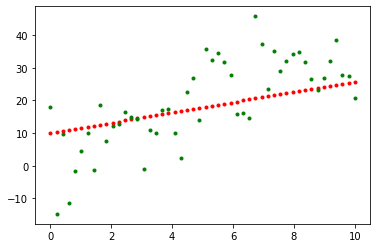

5285.603662721096 1.5789473684210513 10.0


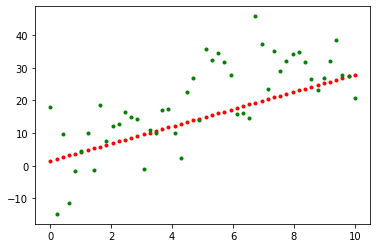

5206.8146727603025 2.6315789473684212 1.5789473684210513


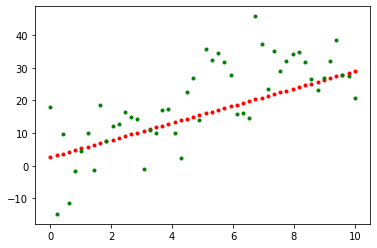

4758.388955386043 2.6315789473684212 2.6315789473684212


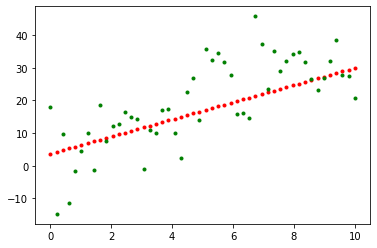

4420.766562111507 2.6315789473684212 3.6842105263157894


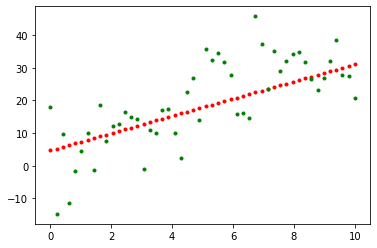

4193.9474929366925 2.6315789473684212 4.7368421052631575


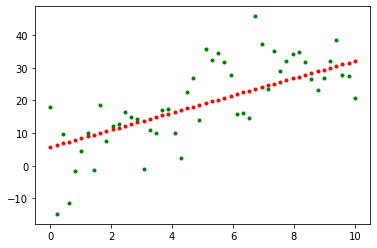

4077.9317478616026 2.6315789473684212 5.789473684210526


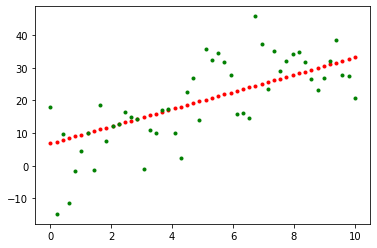

4072.7193268862347 2.6315789473684212 6.842105263157894


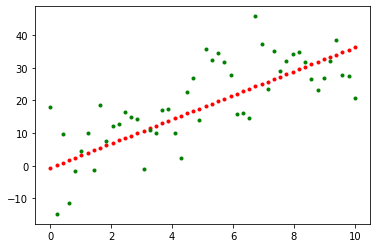

4063.340562792749 3.6842105263157894 -0.526315789473685


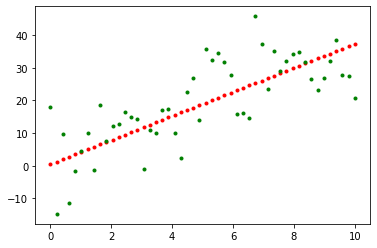

3947.324817717658 3.6842105263157894 0.5263157894736832


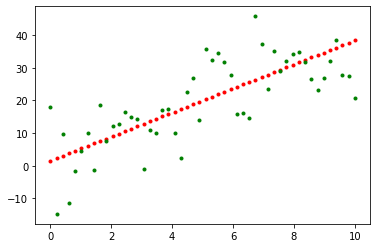

3942.11239674229 3.6842105263157894 1.5789473684210513


In [ ]:
best_loss = 100000
best_m = 0
best_b = 0 

for m_guess in np.linspace(-10,10,20):
    for b_guess in np.linspace(-10,10,20):
        
        y_guess = m_guess * x + b_guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

            plt.plot(x,y_guess,'r.');
            plt.plot(x,y,'g.');
            plt.show()

            print(loss,m_guess,b_guess)

In [ ]:
#synthetic data to make own straight line equation to get back slope and intercept expected, look at best guess thinks slope was 51 and intercept 93 (we gave it 50 and 100 s pretty close) red line is now model to do that